## Determining Whether an Asteroid is Hazardous or Non-Hazardous

ANALYST: Anwesa Roy 

EMAIL: royanwesa15official@gmail.com

### Tasks at hand:

1) Determining Whether an Asteroid is Hazardous or Non-Hazardous.

2) Selecting the important features.

3) Analysis using all the features.

4) Analysis using only the principal features.

5) Comparing test accuracy and training time for (3) and (4).

In [1]:
#IMPORTING MODULES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#to read the csv file
nasa1 = pd.read_csv('nasa.csv')
nasa1.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
#Copied for future use
nasa3=nasa1.copy()
nasa4=nasa1.copy()

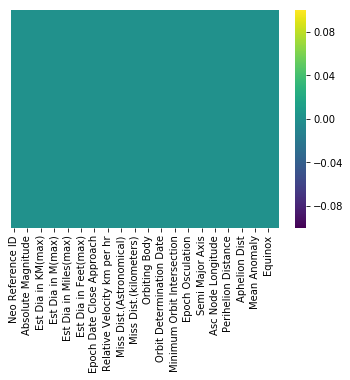

In [4]:
# To check for null or missing values
sns.heatmap(nasa1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [5]:
nasa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

REMARK: None of the data in each of forty columns is null.

### Dropping Irrelevant columns

In [6]:
nasa1.drop('Neo Reference ID',inplace=True,axis=1)

In [7]:
nasa1.drop('Name',inplace=True,axis=1)

In [8]:
nasa1.drop('Orbit Determination Date',inplace=True,axis=1)

In [9]:
nasa1.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### Converting Date in Terms of Days rom the Current Date

https://www.pythonprogramming.in/how-to-calculate-the-time-difference-between-two-datetime-objects.html

In [10]:
# converting date in terms of days from the current date
import datetime

datetimeFormat = '%Y-%m-%d'
def impute_date(cols):
    mydate=cols[0]    
    mydays = (datetime.datetime.now() - datetime.datetime.strptime(mydate, datetimeFormat)).days
    return mydays

In [11]:
nasa1['Close Approach Date']=nasa1[['Close Approach Date']].apply(impute_date,axis=1)

### Renaming Columns

In [12]:
nasa1.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Equinox', 'Hazardous'],
      dtype='object')

In [13]:
nasa1 = nasa1.rename(columns = {"Orbiting Body": "OrbitingBody" }) 
nasa1 = nasa1.rename(columns = {"Close Approach Date": "CloseApproachDate" }) 

# Feature Selection

https://towardsdatascience.com/need-for-feature-engineering-in-machine-learning-897df2ed00e6

https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

### METHOD 1: Calculate the no of features which have zero standard deviation. 

These are the features which are constant. Since these features don't vary, it will have no effect on the model performance.

In [14]:
print (nasa1.describe(include="all")) # Exclude Reference id, name, hazardous, equinox

        Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
count          4687.000000         4687.000000         4687.000000   
unique                 NaN                 NaN                 NaN   
top                    NaN                 NaN                 NaN   
freq                   NaN                 NaN                 NaN   
mean             22.267865            0.204604            0.457509   
std               2.890972            0.369573            0.826391   
min              11.160000            0.001011            0.002260   
25%              20.100000            0.033462            0.074824   
50%              21.900000            0.110804            0.247765   
75%              24.500000            0.253837            0.567597   
max              32.100000           15.579552           34.836938   

        Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  \
count         4687.000000        4687.000000            4687.000000   
unique           

In [15]:
# REMARK: Based on the above statistics we find
# 1) None of the standard deviations is zero.
# 2) Those columns having less standard deviation in the range of 0.3, 0.229. 0.5, 0.24, 0.95
# have comparable means ie (0.204, 0.127, 0.284, 0.81, 1.987 respectively). Although the numerical
# values of standard deviation in thes cases are small; they are comparable to their means, 
# hence cannot be neglected.

# Thus feature selection using standard deviation is not a very viable method in this case.

# COMMENT: Check if conclusion is correct or not.

### METHOD2 : Remove the data having 0 variation in terms of categorical data

Earth    4687
Name: OrbitingBody, dtype: int64

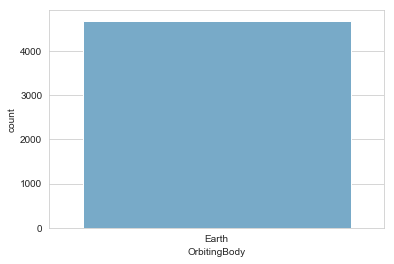

In [16]:
# Count plot of no. of asteroids orbiting a particular planet
sns.set_style('whitegrid')
sns.countplot(x='OrbitingBody',data=nasa1,palette='Blues')
nasa1["OrbitingBody"].value_counts()

In [17]:
# We find that all of the 4687 asteroids are orbiting Earth. So we can drop this column as it has
# no variation.
nasa1.drop('OrbitingBody',inplace=True,axis=1)
nasa1.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),CloseApproachDate,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8987,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,8987,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,8980,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,8973,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8973,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


J2000    4687
Name: Equinox, dtype: int64

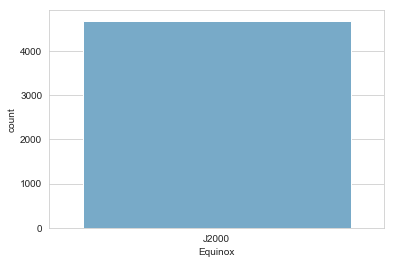

In [18]:
# Count plot based on Equinox
sns.set_style('whitegrid')
sns.countplot(x='Equinox',data=nasa1,palette='Blues')
nasa1["Equinox"].value_counts()

In [19]:
# We find that all of the 4687 asteroids have same value for Equinox. 
# Hence, the column Equinox can be dropped.
nasa1.drop('Equinox',inplace=True,axis=1)
nasa1.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),CloseApproachDate,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8987,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,8987,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,8980,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,8973,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8973,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


### METHOD 3: Remove the features which have a high correlation. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

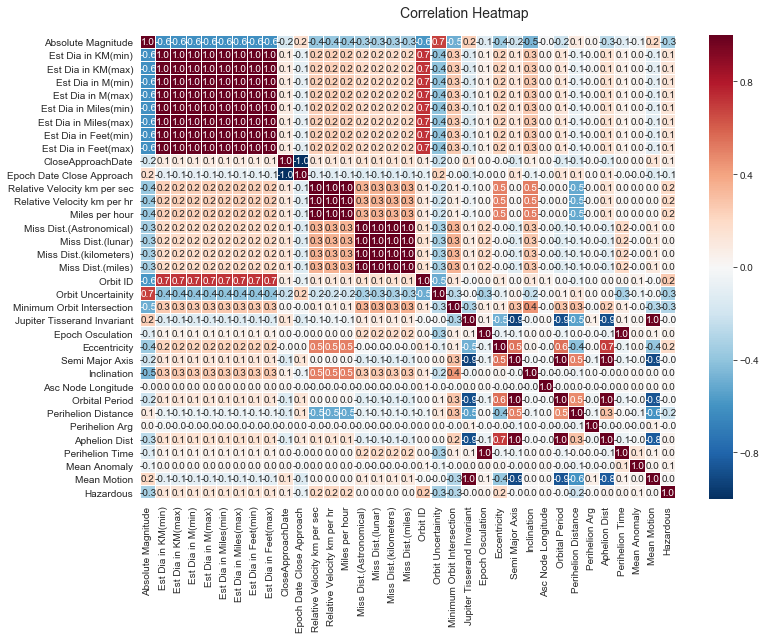

In [20]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(12, 8))
corr = nasa1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="RdBu_r",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

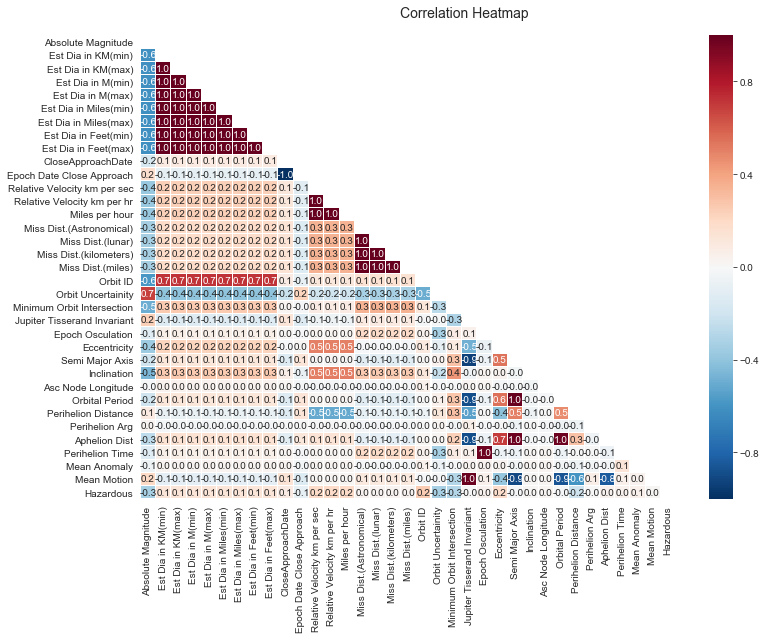

In [21]:
f, ax = plt.subplots(figsize=(12, 8))

corr = nasa1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
hm = sns.heatmap(round(corr,2), mask=mask , annot=True, ax=ax, cmap="RdBu_r",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

In [22]:
# Features could beremoved using Threshold value ie remove those features which has a 
# correlation coefficient >0.8

In [23]:
# Here we find that "Est Dia in KM(max)", "Est Dia in KM(min)", "Est Dia in M(max)", 
# "Est Dia in M(min)", "Est Dia in Miles(max)", "Est Dia in Miles(min)", "Est Dia in Feet(max)",
# "Est Dia in Feet(min)" are BASICALLY MEASURES OF DISTANCE in different units, Hence have
# high correlation amongst themselves. Thus only one among them can be used and the rest can be 
# dropped

In [24]:
# Also, we find that: "Relative Velocity km per sec", "Relative Velocity km per hr",
# "Miles per hour" are basically measures of velocity in different units and have high correlation
# amongst themselves. hence, two of them can be dropped.

In [25]:
# Also, "Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(kilometers)"
# ,"Miss Dist.(miles)" are basically measures of distance in different units, hence have high
# correlation amongst themselves. Hence, three of them can be dropped.

In [26]:
corr_matrix = nasa1.corr().abs()
# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
# List column names of highly correlated features (r >0.8 )
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.8)]
print('Columns that are being dropped: \n')
print(to_drop)
print('\n')
# Drop the features in the to_drop list
reduced_nasa1 = nasa1.drop(to_drop, axis=1)
print("The reduced_df dataframe has {} columns".format(reduced_nasa1.shape[1]))
print('\n')
print('The columns selected for analysis are: \n')
print(reduced_nasa1.columns)

Columns that are being dropped: 

['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'CloseApproachDate', 'Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Semi Major Axis', 'Orbital Period', 'Aphelion Dist']


The reduced_df dataframe has 17 columns


The columns selected for analysis are: 

Index(['Absolute Magnitude', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Miles per hour', 'Miss Dist.(miles)',
       'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Eccentricity', 'Inclination', 'Asc Node Longitude',
       'Perihelion Distance', 'Perihelion Arg', 'Perihelion Time',
       'Mean Anomaly', 'Mean Motion', 'Hazardous'],
      dtype='object')


In [27]:
# Thus, we have successfully reduced dataset having 40 columns to a dataset having 17 columns.

In [28]:
reduced_nasa1.head()

,Absolute Magnitude,Est Dia in Feet(max),Epoch Date Close Approach,Miles per hour,Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,933.308089,788947200000,13680.509944,38993336.0,17,5,0.025282,0.425549,6.025981,314.373913,0.808259,57.257470,2.458162e+06,264.837533,0.590551,True
1,21.3,1071.581063,788947200000,40519.173105,35603420.0,21,3,0.186935,0.351674,28.412996,136.717242,0.718200,313.091975,2.457795e+06,173.741112,0.845330,False
2,20.3,1698.341531,789552000000,16979.661798,4736657.5,22,0,0.043058,0.348248,4.237961,259.475979,0.950791,248.415038,2.458120e+06,292.893654,0.559371,True
3,27.4,64.569144,790156800000,24994.839864,26522368.0,7,6,0.005512,0.216578,7.905894,57.173266,0.983902,18.707701,2.457902e+06,68.741007,0.700277,False
4,21.6,933.308089,790156800000,22012.954985,37910368.0,25,1,0.034798,0.210448,16.793382,84.629307,0.967687,158.263596,2.457814e+06,135.142133,0.726395,True


### METHOD 4: Finding out the coefficients with respect to features using logistic regression. Remove those features which have low lr_coef.

In [29]:

nasa1.head()


,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),CloseApproachDate,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8987,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,8987,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,8980,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,8973,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8973,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [30]:
nasa2 = nasa1.copy()
nasa2.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),CloseApproachDate,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8987,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,8987,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,8980,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,8973,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8973,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [31]:
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#calculating the coeff with respect to columns

X = nasa2.drop("Hazardous",axis=1)
y=nasa2.Hazardous

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Perform a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=0)
# Create the logistic regression model and fit it to the data
lr = LogisticRegression()
lr.fit(X_train, y_train)
# Calculate the accuracy on the test set
acc = accuracy_score(y_test, lr.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(list(zip(X.columns, abs(lr.coef_[0]).round(2))))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


96.3% accuracy on test set.
[('Absolute Magnitude', 5.39), ('Est Dia in KM(min)', 0.35), ('Est Dia in KM(max)', 0.35), ('Est Dia in M(min)', 0.35), ('Est Dia in M(max)', 0.35), ('Est Dia in Miles(min)', 0.35), ('Est Dia in Miles(max)', 0.35), ('Est Dia in Feet(min)', 0.35), ('Est Dia in Feet(max)', 0.35), ('CloseApproachDate', 0.03), ('Epoch Date Close Approach', 0.03), ('Relative Velocity km per sec', 0.0), ('Relative Velocity km per hr', 0.0), ('Miles per hour', 0.0), ('Miss Dist.(Astronomical)', 0.01), ('Miss Dist.(lunar)', 0.01), ('Miss Dist.(kilometers)', 0.01), ('Miss Dist.(miles)', 0.01), ('Orbit ID', 0.07), ('Orbit Uncertainity', 0.41), ('Minimum Orbit Intersection', 7.27), ('Jupiter Tisserand Invariant', 0.23), ('Epoch Osculation', 0.25), ('Eccentricity', 0.06), ('Semi Major Axis', 0.02), ('Inclination', 0.16), ('Asc Node Longitude', 0.0), ('Orbital Period', 0.06), ('Perihelion Distance', 0.07), ('Perihelion Arg', 0.04), ('Aphelion Dist', 0.0), ('Perihelion Time', 0.32), ('Mea

### METHOD 5: Finding out the coefficients with respect to features using random forest classifier. 

In [32]:
from sklearn.ensemble import RandomForestClassifier
# create a list of the feature column's names
X = nasa2.drop("Hazardous",axis=1)
y=nasa2.Hazardous

clf = RandomForestClassifier(n_jobs=2,random_state=0)
clf.fit(X,y)

# view a list of the features and their importance scores
list(zip(X,clf.feature_importances_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[('Absolute Magnitude', 0.00574061208390101),
 ('Est Dia in KM(min)', 0.013228628963120118),
 ('Est Dia in KM(max)', 0.025113200095291128),
 ('Est Dia in M(min)', 0.029031263316721706),
 ('Est Dia in M(max)', 0.1089728573233247),
 ('Est Dia in Miles(min)', 0.01990297697706022),
 ('Est Dia in Miles(max)', 0.007220025931990287),
 ('Est Dia in Feet(min)', 0.03177540291472396),
 ('Est Dia in Feet(max)', 0.008477097660665013),
 ('CloseApproachDate', 0.008605412476968593),
 ('Epoch Date Close Approach', 0.004761314190704915),
 ('Relative Velocity km per sec', 0.0075682837592635915),
 ('Relative Velocity km per hr', 0.011249554667203853),
 ('Miles per hour', 0.012058776002813385),
 ('Miss Dist.(Astronomical)', 0.01852774703893071),
 ('Miss Dist.(lunar)', 0.020928849276288512),
 ('Miss Dist.(kilometers)', 0.021445614423791375),
 ('Miss Dist.(miles)', 0.013203028127952394),
 ('Orbit ID', 0.019530805669292765),
 ('Orbit Uncertainity', 0.027315335031320404),
 ('Minimum Orbit Intersection', 0.3760

## Renaming Principal Columns

In [33]:
reduced_nasa1.columns

Index(['Absolute Magnitude', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Miles per hour', 'Miss Dist.(miles)',
       'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Eccentricity', 'Inclination', 'Asc Node Longitude',
       'Perihelion Distance', 'Perihelion Arg', 'Perihelion Time',
       'Mean Anomaly', 'Mean Motion', 'Hazardous'],
      dtype='object')

In [34]:
reduced_nasa1 = reduced_nasa1.rename(columns = {"Absolute Magnitude": "AbsoluteMagnitude",
                                "Est Dia in Feet(max)":"EstDiainFeet(max)",                               
                                "Close Approach Date":"CloseApproachDate",
                                "Epoch Date Close Approach":"EpochDateCloseApproach",
                                "Miles per hour":"Milesperhour",
                                "Miss Dist.(miles)":"MissDist.(miles)",
                                "Orbit ID":"OrbitID",
                                "Orbit Uncertainity":"OrbitUncertainity",
                                "Minimum Orbit Intersection":"MinimumOrbitIntersection",                                
                                "Asc Node Longitude":"AscNodeLongitude",
                                "Perihelion Distance":"PerihelionDistance",
                                "Perihelion Arg":"PerihelionArg",
                                "Perihelion Time":"PerihelionTime",
                                "Mean Anomaly":"MeanAnomaly",
                                "Mean Motion":"MeanMotion"                                
                               }) 

In [35]:
reduced_nasa1.head()

,AbsoluteMagnitude,EstDiainFeet(max),EpochDateCloseApproach,Milesperhour,MissDist.(miles),OrbitID,OrbitUncertainity,MinimumOrbitIntersection,Eccentricity,Inclination,AscNodeLongitude,PerihelionDistance,PerihelionArg,PerihelionTime,MeanAnomaly,MeanMotion,Hazardous
0,21.6,933.308089,788947200000,13680.509944,38993336.0,17,5,0.025282,0.425549,6.025981,314.373913,0.808259,57.257470,2.458162e+06,264.837533,0.590551,True
1,21.3,1071.581063,788947200000,40519.173105,35603420.0,21,3,0.186935,0.351674,28.412996,136.717242,0.718200,313.091975,2.457795e+06,173.741112,0.845330,False
2,20.3,1698.341531,789552000000,16979.661798,4736657.5,22,0,0.043058,0.348248,4.237961,259.475979,0.950791,248.415038,2.458120e+06,292.893654,0.559371,True
3,27.4,64.569144,790156800000,24994.839864,26522368.0,7,6,0.005512,0.216578,7.905894,57.173266,0.983902,18.707701,2.457902e+06,68.741007,0.700277,False
4,21.6,933.308089,790156800000,22012.954985,37910368.0,25,1,0.034798,0.210448,16.793382,84.629307,0.967687,158.263596,2.457814e+06,135.142133,0.726395,True


## Data Visualization

In [36]:
reduced_nasa1.head()

,AbsoluteMagnitude,EstDiainFeet(max),EpochDateCloseApproach,Milesperhour,MissDist.(miles),OrbitID,OrbitUncertainity,MinimumOrbitIntersection,Eccentricity,Inclination,AscNodeLongitude,PerihelionDistance,PerihelionArg,PerihelionTime,MeanAnomaly,MeanMotion,Hazardous
0,21.6,933.308089,788947200000,13680.509944,38993336.0,17,5,0.025282,0.425549,6.025981,314.373913,0.808259,57.257470,2.458162e+06,264.837533,0.590551,True
1,21.3,1071.581063,788947200000,40519.173105,35603420.0,21,3,0.186935,0.351674,28.412996,136.717242,0.718200,313.091975,2.457795e+06,173.741112,0.845330,False
2,20.3,1698.341531,789552000000,16979.661798,4736657.5,22,0,0.043058,0.348248,4.237961,259.475979,0.950791,248.415038,2.458120e+06,292.893654,0.559371,True
3,27.4,64.569144,790156800000,24994.839864,26522368.0,7,6,0.005512,0.216578,7.905894,57.173266,0.983902,18.707701,2.457902e+06,68.741007,0.700277,False
4,21.6,933.308089,790156800000,22012.954985,37910368.0,25,1,0.034798,0.210448,16.793382,84.629307,0.967687,158.263596,2.457814e+06,135.142133,0.726395,True


False    3932
True      755
Name: Hazardous, dtype: int64

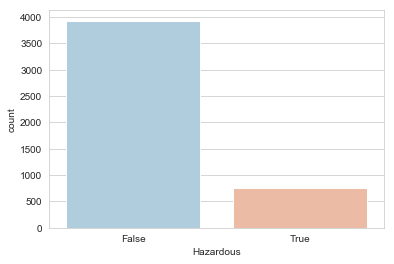

In [37]:
# number of hazardous and non-hazardous asteroids
sns.set_style('whitegrid')
sns.countplot(x='Hazardous',data=reduced_nasa1,palette='RdBu_r')
reduced_nasa1["Hazardous"].value_counts()

In [38]:
# Out of 4687 asteroids, 755 are hazardous and 3932 asteroids are non-hazardous

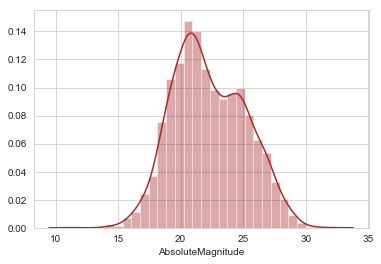

In [39]:
# Near Gaussian Distribution
sns.distplot(reduced_nasa1['AbsoluteMagnitude'].dropna(),kde=True,color='brown',bins=30)

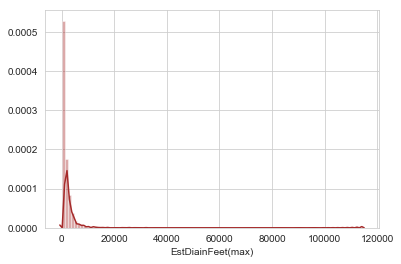

In [40]:
# Gamma Distribution/Exponential Distribution
sns.distplot(reduced_nasa1['EstDiainFeet(max)'].dropna(),kde=True,color='brown',bins=100)

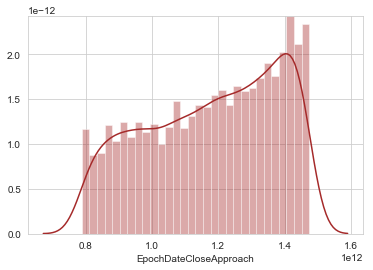

In [41]:
sns.distplot(reduced_nasa1['EpochDateCloseApproach'].dropna(),kde=True,color='brown',bins=30)

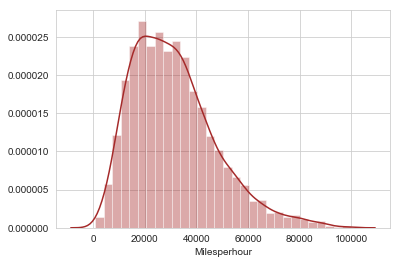

In [42]:
# Gamma Distribution/ Near Gaussian distribution
sns.distplot(reduced_nasa1['Milesperhour'].dropna(),kde=True,color='brown',bins=30)

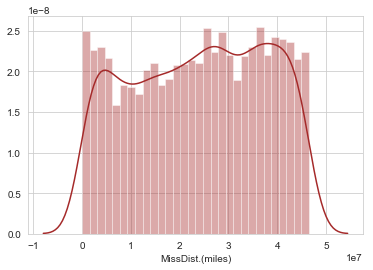

In [43]:
# Near Uniform Distribution
sns.distplot(reduced_nasa1['MissDist.(miles)'].dropna(),kde=True,color='brown',bins=30)

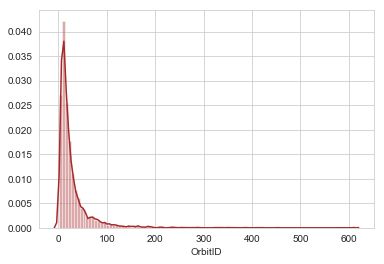

In [44]:
# Gamma Distribution/Exponential Distribution
sns.distplot(reduced_nasa1['OrbitID'].dropna(),kde=True,color='brown',bins=100)

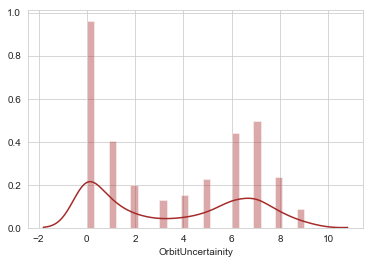

In [45]:
sns.distplot(reduced_nasa1['OrbitUncertainity'].dropna(),kde=True,color='brown',bins=30)

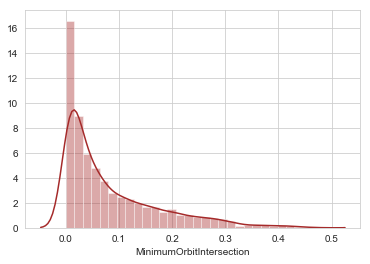

In [46]:
# Gamma Distribution/Exponential Distribution

sns.distplot(reduced_nasa1['MinimumOrbitIntersection'].dropna(),kde=True,color='brown',bins=30)

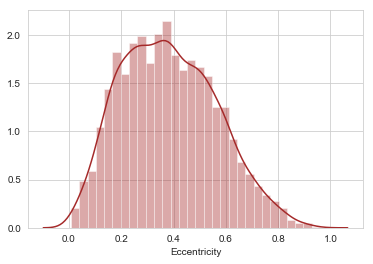

In [47]:
# Gaussian Distribution
sns.distplot(reduced_nasa1['Eccentricity'].dropna(),kde=True,color='brown',bins=30)

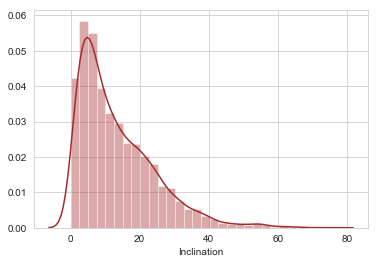

In [48]:
# Gamma Distribution
sns.distplot(reduced_nasa1['Inclination'].dropna(),kde=True,color='brown',bins=30)

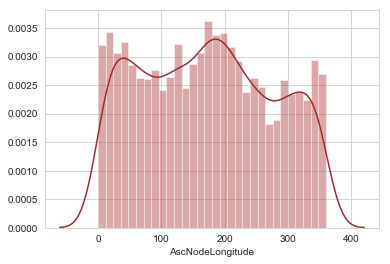

In [49]:
# Near Uniform Distribution
sns.distplot(reduced_nasa1['AscNodeLongitude'].dropna(),kde=True,color='brown',bins=30)

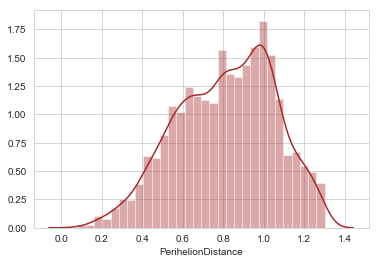

In [50]:
# Gamma Distribution
sns.distplot(reduced_nasa1['PerihelionDistance'].dropna(),kde=True,color='brown',bins=30)

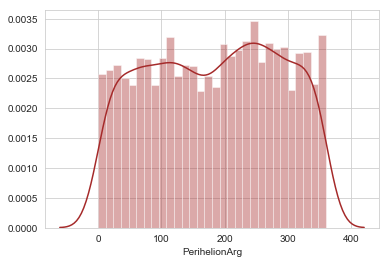

In [51]:
# Uniform Distribution
sns.distplot(reduced_nasa1['PerihelionArg'].dropna(),kde=True,color='brown',bins=30)

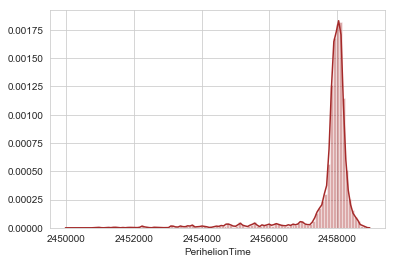

In [52]:
sns.distplot(reduced_nasa1['PerihelionTime'].dropna(),kde=True,color='brown',bins=100)

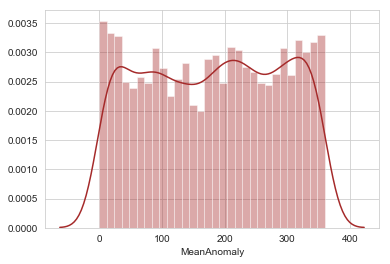

In [53]:
# Uniform Distribution
sns.distplot(reduced_nasa1['MeanAnomaly'].dropna(),kde=True,color='brown',bins=30)

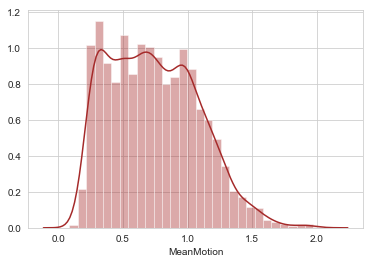

In [54]:
sns.distplot(reduced_nasa1['MeanMotion'].dropna(),kde=True,color='brown',bins=30)

8      235
9      227
7      212
10     205
11     198
12     180
6      178
13     162
15     148
5      139
14     126
4      125
16     125
17     122
18     114
21      99
22      96
20      96
19      92
3       82
25      74
23      70
24      69
26      68
29      61
32      55
28      49
38      46
30      46
31      45
      ... 
99       1
107      1
127      1
131      1
159      1
207      1
211      1
243      1
259      1
271      1
238      1
170      1
264      1
130      1
324      1
328      1
412      1
137      1
149      1
157      1
213      1
229      1
285      1
337      1
335      1
86       1
98       1
114      1
122      1
453      1
Name: OrbitID, Length: 188, dtype: int64

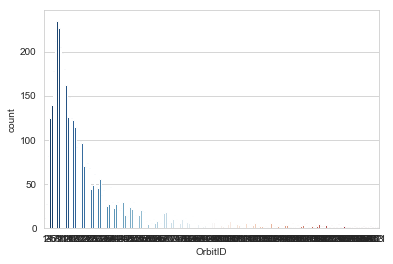

In [55]:
#number of people getting cards
sns.set_style('whitegrid')
sns.countplot(x='OrbitID',data=reduced_nasa1,palette='RdBu_r')
reduced_nasa1["OrbitID"].value_counts()

In [56]:
reduced_nasa1.head()

,AbsoluteMagnitude,EstDiainFeet(max),EpochDateCloseApproach,Milesperhour,MissDist.(miles),OrbitID,OrbitUncertainity,MinimumOrbitIntersection,Eccentricity,Inclination,AscNodeLongitude,PerihelionDistance,PerihelionArg,PerihelionTime,MeanAnomaly,MeanMotion,Hazardous
0,21.6,933.308089,788947200000,13680.509944,38993336.0,17,5,0.025282,0.425549,6.025981,314.373913,0.808259,57.257470,2.458162e+06,264.837533,0.590551,True
1,21.3,1071.581063,788947200000,40519.173105,35603420.0,21,3,0.186935,0.351674,28.412996,136.717242,0.718200,313.091975,2.457795e+06,173.741112,0.845330,False
2,20.3,1698.341531,789552000000,16979.661798,4736657.5,22,0,0.043058,0.348248,4.237961,259.475979,0.950791,248.415038,2.458120e+06,292.893654,0.559371,True
3,27.4,64.569144,790156800000,24994.839864,26522368.0,7,6,0.005512,0.216578,7.905894,57.173266,0.983902,18.707701,2.457902e+06,68.741007,0.700277,False
4,21.6,933.308089,790156800000,22012.954985,37910368.0,25,1,0.034798,0.210448,16.793382,84.629307,0.967687,158.263596,2.457814e+06,135.142133,0.726395,True


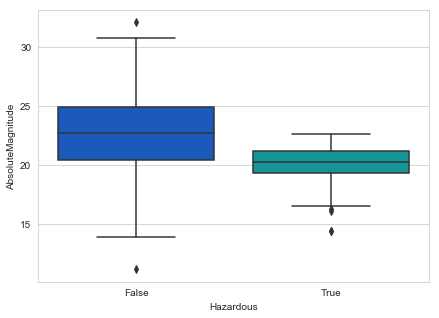

In [57]:
# median "AbsoluteMagnitude" of Hazardous and non-Hazardous Asteroids
# Non-hazardous asteroids tend to have higher "AbsoluteMagnitude"
# "AbsoluteMagnitude" is a moderate parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='AbsoluteMagnitude',data=reduced_nasa1,palette='winter')


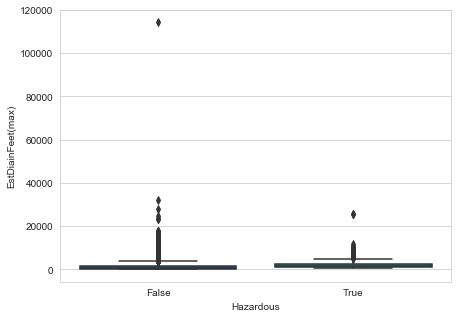

In [58]:
# median Estimated Diameter in Feet (max) "EstDiainFeet(max)"
# and box-plot of Hazardous and non-Hazardous Asteroids
# Since, much information cannot be derived from the boxplot, we take "EstDiainFeet(max)" into
# consideration while training our model.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='EstDiainFeet(max)',data=reduced_nasa1,palette='winter')

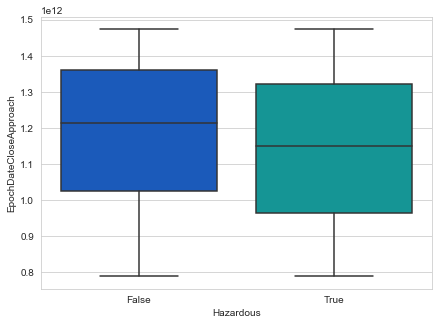

In [59]:
# median "EpochDateCloseApproach" of Hazardous and non-Hazardous asteroids
# Non-Hazardous asteroids tend to have slightly higher "EpochDateCloseApproach" .
# OrbitUncertainity is a moderate parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous.

plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='EpochDateCloseApproach',data=reduced_nasa1,palette='winter')

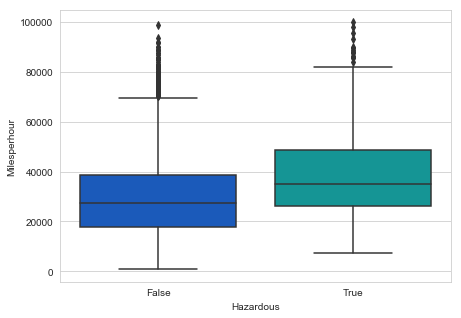

In [60]:
# median speed "Milesperhour" of Hazardous and non-Hazardous asteroids
# Hazardous asteroids tend to have higher median speed in "Milesperhour".
# Speed is a moderate parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='Milesperhour',data=reduced_nasa1,palette='winter')

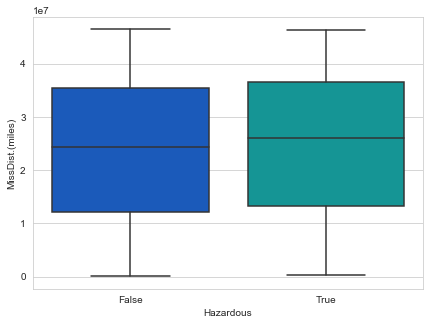

In [61]:
# median Miss Distance(in Miles) "MissDist(miles)" of Hazardous and non-Hazardous asteroids
# Hazardous and non-Hazardous asteroids tend to have similar median "MissDist(miles)".
# "MissDist(miles)" is not an important parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous, hence can be dropped.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='MissDist.(miles)',data=reduced_nasa1,palette='winter')

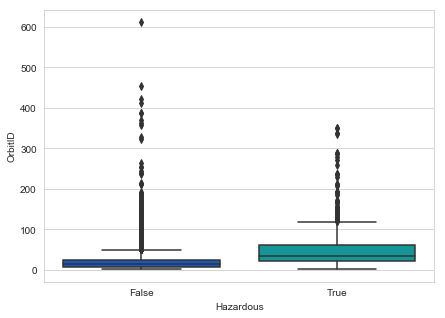

In [62]:
# median OrbitID of Hazardous and non-Hazardous asteroids
# Hazardous asteroids tend to have higher orbit ID.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='OrbitID',data=reduced_nasa1,palette='winter')

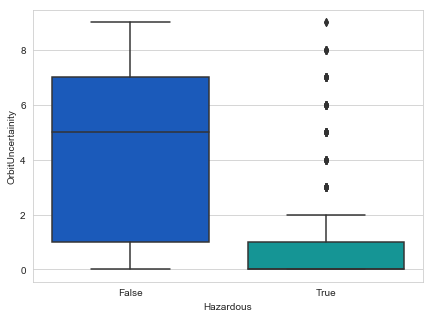

In [63]:
# median OrbitUncertainity of Hazardous and non-Hazardous asteroids
# Non-Hazardous asteroids tend to have higher Orbit Uncertainity.
# OrbitUncertainity is an important parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='OrbitUncertainity',data=reduced_nasa1,palette='winter')

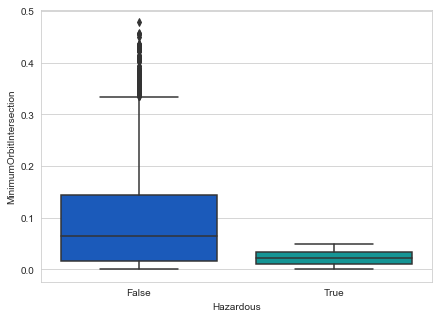

In [64]:
# median "MinimumOrbitIntersection" of Hazardous and non-Hazardous asteroids
# Non-Hazardous asteroids tend to have higher "MinimumOrbitIntersection".
# "MinimumOrbitIntersection" is an important parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='MinimumOrbitIntersection',data=reduced_nasa1,palette='winter')

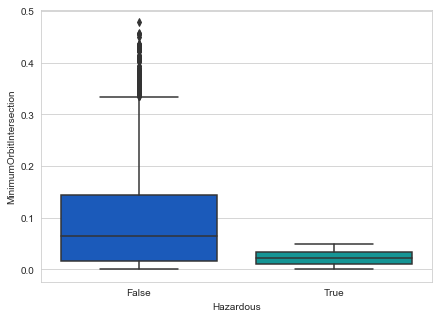

In [65]:
# median "MinimumOrbitIntersection" of Hazardous and non-Hazardous asteroids
# Non-Hazardous asteroids tend to have higher "MinimumOrbitIntersection".
# "MinimumOrbitIntersection" is an important parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='MinimumOrbitIntersection',data=reduced_nasa1,palette='winter')

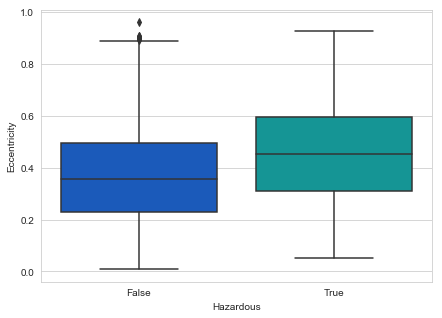

In [66]:
# median "Eccentricity" of Hazardous and non-Hazardous asteroids
# Hazardous asteroids tend to have higher median "Eccentricity".
# "Eccentricity" is a moderate parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='Eccentricity',data=reduced_nasa1,palette='winter')

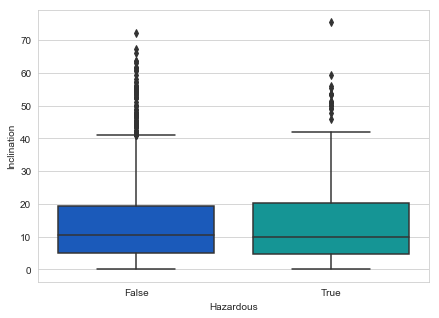

In [67]:
# median "Inclination" of Hazardous and non-Hazardous asteroids
# Hazardous and non-Hazardous asteroids tend to have similar median "Inclination".
# "Inclination" is not an important parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous, hence can be dropped.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='Inclination',data=reduced_nasa1,palette='winter')

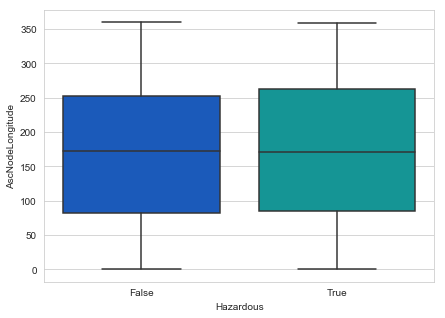

In [68]:
# median "AscNodeLongitude" of Hazardous and non-Hazardous asteroids
# Hazardous and non-Hazardous asteroids tend to have similar median "AscNodeLongitude".
# "AscNodeLongitude" is not an important parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous, hence can be dropped.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='AscNodeLongitude',data=reduced_nasa1,palette='winter')

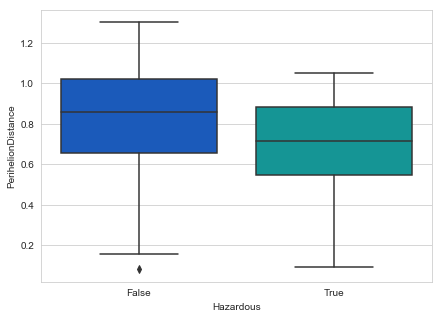

In [69]:
# median "PerihelionDistance" of Hazardous and non-Hazardous asteroids
# Hazardous asteroids tend to have lower median "PerihelionDistance".
# "PerihelionDistance" is a moderate parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='PerihelionDistance',data=reduced_nasa1,palette='winter')

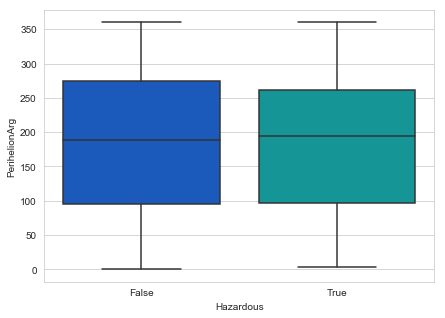

In [70]:
# median "PerihelionArg" of Hazardous and non-Hazardous asteroids
# Hazardous and non-Hazardous asteroids tend to have similar median "PerihelionArg".
# "PerihelionArg" is not an important parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous, hence can be dropped.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='PerihelionArg',data=reduced_nasa1,palette='winter')

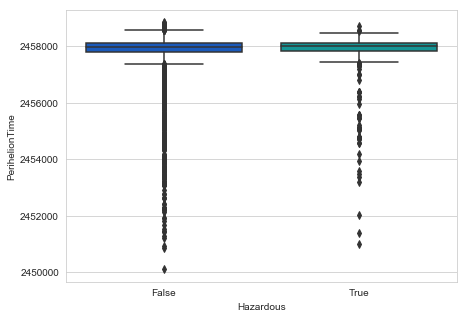

In [71]:
# median "PerihelionTime" of Hazardous and non-Hazardous asteroids
# Hazardous and non-Hazardous asteroids tend to have similar median "PerihelionTime".
# "PerihelionArg" is a moderate parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous. Since there are a large number
# of outliers present here. We consider it as a moderate determiner.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='PerihelionTime',data=reduced_nasa1,palette='winter')

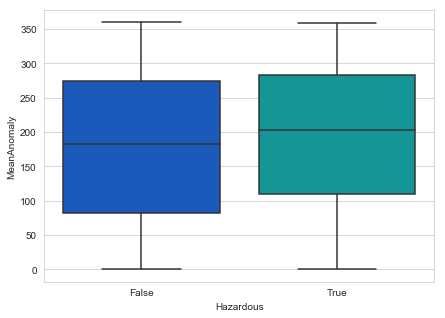

In [72]:
# median "MeanAnomaly" of Hazardous and non-Hazardous asteroids
# Hazardous asteroids tend to have slightly higher median "MeanAnomaly".
# "MeanAnomaly" is not a moderate parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='MeanAnomaly',data=reduced_nasa1,palette='winter')

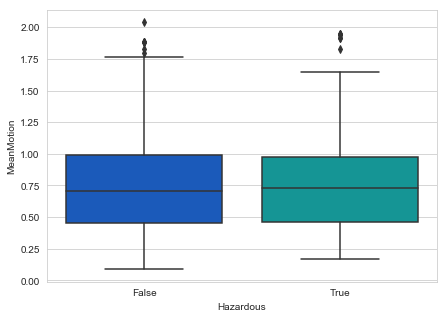

In [73]:
# median "MeanMotion" of Hazardous and non-Hazardous asteroids
# Hazardous and non-Hazardous asteroids tend to have similar median "MeanMotion".
# "PerihelionArg" is not an important parameter in determining whether an 
# asteroid is Hazardous or non-Hazardous, hence can be dropped.
plt.figure(figsize=(7,5))
sns.boxplot(x='Hazardous',y='MeanMotion',data=reduced_nasa1,palette='winter')

In [74]:
# From the above analysis we find that the following parameters are not important 
# in determining whether an asteroid is hazardous or non-hazardous, Hence can be dropped.

1) MissDist.(miles)

2) Inclination

3) AscNodeLongitude

4) PerihelionArg

5) MeanMotion



In [75]:
# REMARK: We are going to keep "MissDist.(miles)" for analysis because it seems to be an important 
# parameter in determining whether an asterod is hazardous or not. We are going to drop the rest:

# 1)Inclination
# 2)AscNodeLongitude
# 3) PerihelionArg
# 4) MeanMotion


### Dropping Insignificant Parameters.

In [76]:
reduced_nasa1.drop('Inclination',inplace=True,axis=1)
reduced_nasa1.drop('AscNodeLongitude',inplace=True,axis=1)
reduced_nasa1.drop('PerihelionArg',inplace=True,axis=1)
reduced_nasa1.drop('MeanMotion',inplace=True,axis=1)

In [77]:
reduced_nasa1.head()

,AbsoluteMagnitude,EstDiainFeet(max),EpochDateCloseApproach,Milesperhour,MissDist.(miles),OrbitID,OrbitUncertainity,MinimumOrbitIntersection,Eccentricity,PerihelionDistance,PerihelionTime,MeanAnomaly,Hazardous
0,21.6,933.308089,788947200000,13680.509944,38993336.0,17,5,0.025282,0.425549,0.808259,2.458162e+06,264.837533,True
1,21.3,1071.581063,788947200000,40519.173105,35603420.0,21,3,0.186935,0.351674,0.718200,2.457795e+06,173.741112,False
2,20.3,1698.341531,789552000000,16979.661798,4736657.5,22,0,0.043058,0.348248,0.950791,2.458120e+06,292.893654,True
3,27.4,64.569144,790156800000,24994.839864,26522368.0,7,6,0.005512,0.216578,0.983902,2.457902e+06,68.741007,False
4,21.6,933.308089,790156800000,22012.954985,37910368.0,25,1,0.034798,0.210448,0.967687,2.457814e+06,135.142133,True


In [78]:
# REMARK: We note that "MissDist.(miles)", "AscNodeLongitude" and "PerihelionArg" have Uniform
# Distribution as observed from distplots in an earlier exercise.

# Review

For the given dataset, we have forty features as mentined below:

In [79]:
print(nasa3.columns)
print('Number of columns before feature selection')
print(len(nasa3.columns))

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')
Number of columns before feature s

After feature selection we are left with 13 columns, which are mentioned below:

In [80]:
print(reduced_nasa1.columns)
print('Number of columns after feature selection')
print(len(reduced_nasa1.columns))

Index(['AbsoluteMagnitude', 'EstDiainFeet(max)', 'EpochDateCloseApproach',
       'Milesperhour', 'MissDist.(miles)', 'OrbitID', 'OrbitUncertainity',
       'MinimumOrbitIntersection', 'Eccentricity', 'PerihelionDistance',
       'PerihelionTime', 'MeanAnomaly', 'Hazardous'],
      dtype='object')
Number of columns after feature selection
13


https://discuss.analyticsvidhya.com/t/how-to-calculate-the-model-building-and-predicting-time-of-a-classifier-in-python/6334

# Logistic Regression

## Taking All the features into consideration:

In [81]:
#IMPORTING MODULES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time 

In [82]:
print(nasa1.columns)
print('Number of feature attributes:')
print(len(nasa1.columns))

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'CloseApproachDate', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')
Number of feature attributes:
35


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
t0=time.time()

In [85]:
X = nasa1.drop("Hazardous",axis=1)
y = nasa1.Hazardous

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [86]:
x_train,x_test,y_train,y_test=train_test_split(X_std,
                            nasa1['Hazardous'],test_size=0.30,random_state=101)
print("No. of Train rows -> ",len(y_train))
print("No. of Test rows -> ",len(y_test))

No. of Train rows ->  3280
No. of Test rows ->  1407


In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
predictions=logmodel.predict(x_test)
predictions,len(predictions)

(array([False, False,  True, ...,  True, False, False]), 1407)

In [90]:
TrainingTime_LogReg_AllFeatures=time.time()-t0
print("training time:", round(time.time()-t0, 6), "s")

training time: 1.808803 s


In [91]:
from sklearn.metrics import classification_report

In [92]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97      1169
        True       0.86      0.80      0.83       238

   micro avg       0.94      0.94      0.94      1407
   macro avg       0.91      0.89      0.90      1407
weighted avg       0.94      0.94      0.94      1407



In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
print (y_test.value_counts())
print(confusion_matrix(y_test,predictions))
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

#                 predicted     
# actual    class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

False    1169
True      238
Name: Hazardous, dtype: int64
[[1139   30]
 [  48  190]]
         Predicted Class 0  Predicted Class 1
Class 0               1139                 30
Class 1                 48                190


In [95]:
print(logmodel.coef_)

[[-5.0878251  -0.301506   -0.30150599 -0.30150599 -0.30150599 -0.301506
  -0.30150599 -0.30150599 -0.30150599 -0.04771847  0.04780458 -0.00965124
  -0.00965124 -0.00965124 -0.00824145 -0.00824009 -0.00824103 -0.00824112
   0.03581954 -0.42373289 -7.3852987   0.15529109  0.14180194 -0.20278412
   0.01530017  0.14924911  0.05508658  0.05345955 -0.28391752  0.02064124
   0.08908288 -0.17047367  0.17288455 -0.38552275]]


In [96]:
print(logmodel.intercept_)

[-6.53233201]


In [97]:
from sklearn.metrics import accuracy_score
score_LogReg_AllFeatures=accuracy_score(y_test,predictions)
score_LogReg_AllFeatures

0.9445628997867804

# Logistic Regression

## Taking Principal Attributes into Consideration

In [98]:
#IMPORTING MODULES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time 

In [99]:
reduced_nasa1.head()

,AbsoluteMagnitude,EstDiainFeet(max),EpochDateCloseApproach,Milesperhour,MissDist.(miles),OrbitID,OrbitUncertainity,MinimumOrbitIntersection,Eccentricity,PerihelionDistance,PerihelionTime,MeanAnomaly,Hazardous
0,21.6,933.308089,788947200000,13680.509944,38993336.0,17,5,0.025282,0.425549,0.808259,2.458162e+06,264.837533,True
1,21.3,1071.581063,788947200000,40519.173105,35603420.0,21,3,0.186935,0.351674,0.718200,2.457795e+06,173.741112,False
2,20.3,1698.341531,789552000000,16979.661798,4736657.5,22,0,0.043058,0.348248,0.950791,2.458120e+06,292.893654,True
3,27.4,64.569144,790156800000,24994.839864,26522368.0,7,6,0.005512,0.216578,0.983902,2.457902e+06,68.741007,False
4,21.6,933.308089,790156800000,22012.954985,37910368.0,25,1,0.034798,0.210448,0.967687,2.457814e+06,135.142133,True


In [100]:
print(reduced_nasa1.columns)
print('Number of columns:')
print(len(reduced_nasa1.columns))

Index(['AbsoluteMagnitude', 'EstDiainFeet(max)', 'EpochDateCloseApproach',
       'Milesperhour', 'MissDist.(miles)', 'OrbitID', 'OrbitUncertainity',
       'MinimumOrbitIntersection', 'Eccentricity', 'PerihelionDistance',
       'PerihelionTime', 'MeanAnomaly', 'Hazardous'],
      dtype='object')
Number of columns:
13


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
t0=time.time()

In [103]:
X = reduced_nasa1.drop("Hazardous",axis=1)
y = reduced_nasa1.Hazardous

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [104]:
x_train,x_test,y_train,y_test=train_test_split(X_std,
                            reduced_nasa1['Hazardous'],test_size=0.30,random_state=101)
print("No. of Train rows -> ",len(y_train))
print("No. of Test rows -> ",len(y_test))

No. of Train rows ->  3280
No. of Test rows ->  1407


In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
predictions=logmodel.predict(x_test)
predictions,len(predictions)

(array([False, False,  True, ...,  True, False, False]), 1407)

In [108]:
TrainingTime_LogReg_PrincipalFeatures=time.time()-t0
print("training time:", round(time.time()-t0, 6), "s")

training time: 1.509691 s


In [109]:
from sklearn.metrics import classification_report

In [110]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97      1169
        True       0.87      0.80      0.83       238

   micro avg       0.95      0.95      0.95      1407
   macro avg       0.91      0.89      0.90      1407
weighted avg       0.94      0.95      0.94      1407



In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
print (y_test.value_counts())
print(confusion_matrix(y_test,predictions))
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

#                 predicted     
# actual    class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

False    1169
True      238
Name: Hazardous, dtype: int64
[[1140   29]
 [  48  190]]
         Predicted Class 0  Predicted Class 1
Class 0               1140                 29
Class 1                 48                190


In [113]:
print(logmodel.coef_)

[[-5.02892215 -2.16094444  0.09714119  0.06346599 -0.05466231 -0.04574969
  -0.42010667 -7.38283544  0.05959081  0.11506471 -0.03136011  0.16247002]]


In [114]:
print(logmodel.intercept_)

[-6.48292271]


In [115]:
from sklearn.metrics import accuracy_score
score_LogReg_PrincipalFeatures=accuracy_score(y_test,predictions)
score_LogReg_PrincipalFeatures

0.945273631840796

In [116]:
# Training Time Comparison
print("Training Time for Logistic Regression when all Features are Taken into Account:",TrainingTime_LogReg_AllFeatures,"s")
print("Training Time for Logistic Regression when principal Features are Taken into Account:",TrainingTime_LogReg_PrincipalFeatures,"s")
#Improvement:
impTimeLogReg=((TrainingTime_LogReg_AllFeatures-TrainingTime_LogReg_PrincipalFeatures)/(TrainingTime_LogReg_AllFeatures))*100
print("Percentage Improvement: ",impTimeLogReg,"%")

Training Time for Logistic Regression when all Features are Taken into Account: 1.8088033199310303 s
Training Time for Logistic Regression when principal Features are Taken into Account: 1.509690761566162 s
Percentage Improvement:  16.536488797260354 %


In [117]:
# Score Comparison
print("Score for Logistic Regression when all Features are Taken into Account:",score_LogReg_AllFeatures)
print("Score for Logistic Regression when principal Features are Taken into Account:",score_LogReg_PrincipalFeatures)
impScoreLogReg=((score_LogReg_PrincipalFeatures-score_LogReg_AllFeatures)/(score_LogReg_AllFeatures))*100
print("Percentage Improvement: ",impScoreLogReg,"%")



Score for Logistic Regression when all Features are Taken into Account: 0.9445628997867804
Score for Logistic Regression when principal Features are Taken into Account: 0.945273631840796
Percentage Improvement:  0.0752445447705021 %


# K Nearest Neighbours

## Taking All the Feature Attributes into Consideration

In [118]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import seaborn as sns

In [119]:
nasa1.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),CloseApproachDate,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8987,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,8987,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,8980,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,8973,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8973,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [120]:
t0=time.time()

In [121]:
X = nasa1.drop("Hazardous",axis=1).as_matrix()
y = np.array(nasa1['Hazardous'])

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print(X_std)
print(y)

[[-0.23104209 -0.20941058 -0.20941058 ...  0.45919023  0.77839321
  -0.43110028]
 [-0.33482448 -0.15840557 -0.15840557 ...  0.07081791 -0.06909298
   0.31258164]
 [-0.68076581  0.07278876  0.07278876 ...  0.41557933  1.03940428
  -0.52211437]
 ...
 [ 0.14949337 -0.34623784 -0.34623784 ...  0.60624482  0.20776991
  -0.63207867]
 [-0.16185382 -0.23970271 -0.23970271 ...  0.5933032   0.2079915
  -0.56766111]
 [-1.09278193  0.53049632  0.53049632 ...  0.62542342  0.03397983
  -0.54733945]]
[ True False  True ... False False False]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [122]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.30,random_state=101)
                                                        
print("No. of Train rows -> ",len(y_train))
print("No. of Test rows -> ",len(y_test))

No. of Train rows ->  3280
No. of Test rows ->  1407


In [123]:
clf = neighbors.KNeighborsClassifier(5, weights = 'uniform') # 3 neighbours
trained_model = clf.fit(x_train, y_train)
print ("trained_model: ",trained_model)

trained_model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [124]:
predictions=trained_model.predict(x_test)
print(predictions,len(predictions))


[False False False ... False False False] 1407


In [125]:
TrainingTime_KNN_AllAttributes=time.time()-t0
print("training time:", round(time.time()-t0, 6), "s")

training time: 2.438238 s


In [126]:
# View The Model’s Score
# How good is our trained model compared to our training data?
trained_model.score(X_std, y)

0.9061233198207809

In [127]:
from sklearn.metrics import classification_report

In [128]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      1169
        True       0.78      0.42      0.54       238

   micro avg       0.88      0.88      0.88      1407
   macro avg       0.84      0.70      0.74      1407
weighted avg       0.87      0.88      0.87      1407



In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
print (len(y_test))
print(confusion_matrix(y_test,predictions))
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

#                 predicted     
# actual    class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

1407
[[1141   28]
 [ 139   99]]
         Predicted Class 0  Predicted Class 1
Class 0               1141                 28
Class 1                139                 99


In [131]:
from sklearn.metrics import accuracy_score
score_KNN_AllAttributes=accuracy_score(y_test,predictions)
score_KNN_AllAttributes

0.8813077469793887

# K-Nearest Neighbours

## Taking Principal Feature Attributes into Consideration

In [132]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import seaborn as sns

In [133]:
reduced_nasa1.head()

,AbsoluteMagnitude,EstDiainFeet(max),EpochDateCloseApproach,Milesperhour,MissDist.(miles),OrbitID,OrbitUncertainity,MinimumOrbitIntersection,Eccentricity,PerihelionDistance,PerihelionTime,MeanAnomaly,Hazardous
0,21.6,933.308089,788947200000,13680.509944,38993336.0,17,5,0.025282,0.425549,0.808259,2.458162e+06,264.837533,True
1,21.3,1071.581063,788947200000,40519.173105,35603420.0,21,3,0.186935,0.351674,0.718200,2.457795e+06,173.741112,False
2,20.3,1698.341531,789552000000,16979.661798,4736657.5,22,0,0.043058,0.348248,0.950791,2.458120e+06,292.893654,True
3,27.4,64.569144,790156800000,24994.839864,26522368.0,7,6,0.005512,0.216578,0.983902,2.457902e+06,68.741007,False
4,21.6,933.308089,790156800000,22012.954985,37910368.0,25,1,0.034798,0.210448,0.967687,2.457814e+06,135.142133,True


In [134]:
t0=time.time()

In [135]:
X = reduced_nasa1.drop("Hazardous",axis=1).as_matrix()
y = np.array(reduced_nasa1['Hazardous'])

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print(X_std)
print(y)

[[-0.23104209 -0.20941058 -1.97308738 ... -0.02117222  0.45919023
   0.77839321]
 [-0.33482448 -0.15840557 -1.97308738 ... -0.39326705  0.07081791
  -0.06909298]
 [-0.68076581  0.07278876 -1.97003488 ...  0.56772222  0.41557933
   1.03940428]
 ...
 [ 0.14949337 -0.34623784  1.48101361 ...  0.62957072  0.60624482
   0.20776991]
 [-0.16185382 -0.23970271  1.48101361 ...  1.53732602  0.5933032
   0.2079915 ]
 [-1.09278193  0.53049632  1.48101361 ...  0.25916643  0.62542342
   0.03397983]]
[ True False  True ... False False False]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [136]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.30,random_state=101)
                                                        
print("No. of Train rows -> ",len(y_train))
print("No. of Test rows -> ",len(y_test))

No. of Train rows ->  3280
No. of Test rows ->  1407


In [137]:
clf = neighbors.KNeighborsClassifier(5, weights = 'uniform') # 3 neighbours
trained_model = clf.fit(x_train, y_train)
print ("trained_model: ",trained_model)

trained_model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [138]:
predictions=trained_model.predict(x_test)
print(predictions,len(predictions))

[False False  True ... False False False] 1407


In [139]:
TrainingTime_KNN_PrincipalAttributes=time.time()-t0
print("training time:", round(time.time()-t0, 6), "s")

training time: 1.598317 s


In [140]:
# View The Model’s Score
# How good is our trained model compared to our training data?
trained_model.score(X_std, y)

0.9306592703221677

In [141]:
from sklearn.metrics import classification_report

In [142]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.92      0.97      0.95      1169
        True       0.81      0.59      0.68       238

   micro avg       0.91      0.91      0.91      1407
   macro avg       0.86      0.78      0.81      1407
weighted avg       0.90      0.91      0.90      1407



In [143]:
print (len(y_test))
print(confusion_matrix(y_test,predictions))
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

#                 predicted     
# actual    class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

1407
[[1136   33]
 [  98  140]]
         Predicted Class 0  Predicted Class 1
Class 0               1136                 33
Class 1                 98                140


In [144]:
from sklearn.metrics import accuracy_score
score_KNN_PrincipalAttributes=accuracy_score(y_test,predictions)
score_KNN_PrincipalAttributes

0.9068941009239516

In [145]:
# Training Time Comparison
print("Training Time for KNN Classifier when all Features are Taken into Account:",TrainingTime_KNN_AllAttributes,"s")
print("Training Time for KNN Classifier when principal Features are Taken into Account:",TrainingTime_KNN_PrincipalAttributes,"s")
#Improvement:
impTimeKnn=((TrainingTime_KNN_AllAttributes-TrainingTime_KNN_PrincipalAttributes)/(TrainingTime_KNN_AllAttributes))*100
print("Percentage Improvement: ",impTimeKnn,"%")


Training Time for KNN Classifier when all Features are Taken into Account: 2.4382376670837402 s
Training Time for KNN Classifier when principal Features are Taken into Account: 1.5983169078826904 s
Percentage Improvement:  34.44786250905717 %


In [146]:
# Score Comparison
print("Score for KNN Classifier when all Features are Taken into Account:",score_KNN_AllAttributes)
print("Score for KNN Classifier when principal Features are Taken into Account:",score_KNN_PrincipalAttributes)
impScoreKnn=((score_KNN_PrincipalAttributes-score_KNN_AllAttributes)/(score_KNN_AllAttributes))*100
print("Percentage Improvement: ",impScoreKnn,"%")


Score for KNN Classifier when all Features are Taken into Account: 0.8813077469793887
Score for KNN Classifier when principal Features are Taken into Account: 0.9068941009239516
Percentage Improvement:  2.9032258064516108 %


# Decision Tree Classifier

## Taking All the Feature Attributes into Consideration

In [147]:
import pandas as pd

In [148]:
nasa1.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),CloseApproachDate,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8987,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,8987,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,8980,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,8973,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8973,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [149]:
nasa1.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),CloseApproachDate,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,4462.282697,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,2293.449636,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,1066.000000,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,2429.000000,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,4194.000000,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,6364.000000,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,8987.000000,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [150]:
# Columns
nasa1.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'CloseApproachDate', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

In [151]:
nasa1.Hazardous.value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [152]:
# Find % Values of Target Variable Levels
round(nasa1.Hazardous.value_counts()*100/len(nasa1.axes[0]),2)

False    83.89
True     16.11
Name: Hazardous, dtype: float64

In [153]:
t0=time.time()

In [154]:
from sklearn.preprocessing import StandardScaler 

In [155]:
X = nasa1.drop("Hazardous",axis=1)
y = nasa1.Hazardous

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print(X_std)
print(y)

[[-0.23104209 -0.20941058 -0.20941058 ...  0.45919023  0.77839321
  -0.43110028]
 [-0.33482448 -0.15840557 -0.15840557 ...  0.07081791 -0.06909298
   0.31258164]
 [-0.68076581  0.07278876  0.07278876 ...  0.41557933  1.03940428
  -0.52211437]
 ...
 [ 0.14949337 -0.34623784 -0.34623784 ...  0.60624482  0.20776991
  -0.63207867]
 [-0.16185382 -0.23970271 -0.23970271 ...  0.5933032   0.2079915
  -0.56766111]
 [-1.09278193  0.53049632  0.53049632 ...  0.62542342  0.03397983
  -0.54733945]]
0        True
1       False
2        True
3       False
4        True
5       False
6       False
7       False
8       False
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22       True
23      False
24      False
25       True
26      False
27       True
28      False
29      False
        ...  
4657    False
4658    False
4659    False
4660    False
4661    False
4662 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.30,random_state=101)
                                                        
print("No. of Train rows -> ",len(y_train))
print("No. of Test rows -> ",len(y_test))

No. of Train rows ->  3280
No. of Test rows ->  1407


In [158]:
# Load library
#from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Building Decision Tree - CART Algorithm (gini criteria)
dt_train_gini = DecisionTreeClassifier(criterion = "gini", 
                                       random_state = 100,
                               max_depth=5, min_samples_leaf=5)
# Train
dt_train_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [159]:
from sklearn import tree
with open("nasa_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)

In [160]:
TrainingTime_DecTree_AllAttributes=time.time()-t0
print("training time:", round(time.time()-t0, 6), "s")

training time: 1.864651 s


In [161]:
score4=dt_train_gini.score(x_train, y_train)
score4

0.9975609756097561


This step creates a text file dt_train_gini.txt in the default folder. We can give full path as well. We can copy the context of this text file and put into the box on http://www.webgraphviz.com/

In [162]:
predictions=dt_train_gini.predict(x_test)
print(predictions,len(predictions))

[False False  True ...  True False False] 1407


In [163]:
from sklearn.metrics import classification_report

In [164]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      1169
        True       0.98      0.97      0.98       238

   micro avg       0.99      0.99      0.99      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       0.99      0.99      0.99      1407



In [165]:
print (len(y_test))
print(confusion_matrix(y_test,predictions))
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

#                 predicted     
# actual    class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

1407
[[1165    4]
 [   6  232]]
         Predicted Class 0  Predicted Class 1
Class 0               1165                  4
Class 1                  6                232


In [166]:
from sklearn.metrics import accuracy_score
score_DecTree_AllAttributes=accuracy_score(y_test,predictions)
score_DecTree_AllAttributes

0.9928926794598436

# Decision Tree

## Taking the Principal Feature Attributes into Consideration

In [167]:
import pandas as pd

In [168]:
reduced_nasa1.head()

,AbsoluteMagnitude,EstDiainFeet(max),EpochDateCloseApproach,Milesperhour,MissDist.(miles),OrbitID,OrbitUncertainity,MinimumOrbitIntersection,Eccentricity,PerihelionDistance,PerihelionTime,MeanAnomaly,Hazardous
0,21.6,933.308089,788947200000,13680.509944,38993336.0,17,5,0.025282,0.425549,0.808259,2.458162e+06,264.837533,True
1,21.3,1071.581063,788947200000,40519.173105,35603420.0,21,3,0.186935,0.351674,0.718200,2.457795e+06,173.741112,False
2,20.3,1698.341531,789552000000,16979.661798,4736657.5,22,0,0.043058,0.348248,0.950791,2.458120e+06,292.893654,True
3,27.4,64.569144,790156800000,24994.839864,26522368.0,7,6,0.005512,0.216578,0.983902,2.457902e+06,68.741007,False
4,21.6,933.308089,790156800000,22012.954985,37910368.0,25,1,0.034798,0.210448,0.967687,2.457814e+06,135.142133,True


In [169]:
reduced_nasa1.describe()

,AbsoluteMagnitude,EstDiainFeet(max),EpochDateCloseApproach,Milesperhour,MissDist.(miles),OrbitID,OrbitUncertainity,MinimumOrbitIntersection,Eccentricity,PerihelionDistance,PerihelionTime,MeanAnomaly
count,4687.000000,4687.000000,4.687000e+03,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000
mean,22.267865,1501.013521,1.179881e+12,31251.307268,2.386902e+07,28.300619,3.516962,0.082320,0.382569,0.813383,2.457728e+06,181.167927
std,2.890972,2711.257465,1.981540e+11,16314.209644,1.355279e+07,38.299668,3.078307,0.090300,0.180444,0.242059,9.442264e+02,107.501623
min,11.160000,7.413530,7.889472e+11,750.489149,1.653462e+04,1.000000,0.000000,0.000002,0.007522,0.080744,2.450100e+06,0.003191
25%,20.100000,245.485039,1.015574e+12,18863.475327,1.240212e+07,9.000000,0.000000,0.014585,0.240858,0.630834,2.457815e+06,87.006918
50%,21.900000,812.877364,1.203062e+12,28896.026390,2.463595e+07,16.000000,3.000000,0.047365,0.372450,0.833153,2.457973e+06,185.718889
75%,24.500000,1862.194459,1.355558e+12,40437.892430,3.570935e+07,31.000000,6.000000,0.123593,0.512411,0.997227,2.458108e+06,276.531946
max,32.100000,114294.420501,1.473318e+12,99841.227826,4.646713e+07,611.000000,9.000000,0.477891,0.960261,1.299832,2.458839e+06,359.917991


In [170]:
# Columns
reduced_nasa1.columns

Index(['AbsoluteMagnitude', 'EstDiainFeet(max)', 'EpochDateCloseApproach',
       'Milesperhour', 'MissDist.(miles)', 'OrbitID', 'OrbitUncertainity',
       'MinimumOrbitIntersection', 'Eccentricity', 'PerihelionDistance',
       'PerihelionTime', 'MeanAnomaly', 'Hazardous'],
      dtype='object')

In [171]:
reduced_nasa1.Hazardous.value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [172]:
# Find % Values of Target Variable Levels
round(reduced_nasa1.Hazardous.value_counts()*100/len(reduced_nasa1.axes[0]),2)

False    83.89
True     16.11
Name: Hazardous, dtype: float64

In [173]:
t0=time.time()

In [174]:
from sklearn.preprocessing import StandardScaler 

In [175]:
X = reduced_nasa1.drop("Hazardous",axis=1)
y = reduced_nasa1.Hazardous

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print(X_std)
print(y)

[[-0.23104209 -0.20941058 -1.97308738 ... -0.02117222  0.45919023
   0.77839321]
 [-0.33482448 -0.15840557 -1.97308738 ... -0.39326705  0.07081791
  -0.06909298]
 [-0.68076581  0.07278876 -1.97003488 ...  0.56772222  0.41557933
   1.03940428]
 ...
 [ 0.14949337 -0.34623784  1.48101361 ...  0.62957072  0.60624482
   0.20776991]
 [-0.16185382 -0.23970271  1.48101361 ...  1.53732602  0.5933032
   0.2079915 ]
 [-1.09278193  0.53049632  1.48101361 ...  0.25916643  0.62542342
   0.03397983]]
0        True
1       False
2        True
3       False
4        True
5       False
6       False
7       False
8       False
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22       True
23      False
24      False
25       True
26      False
27       True
28      False
29      False
        ...  
4657    False
4658    False
4659    False
4660    False
4661    False
4662 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.30,random_state=101)
                                                        
print("No. of Train rows -> ",len(y_train))
print("No. of Test rows -> ",len(y_test))

No. of Train rows ->  3280
No. of Test rows ->  1407


In [178]:
# Load library
#from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Building Decision Tree - CART Algorithm (gini criteria)
dt_train_gini = DecisionTreeClassifier(criterion = "gini", 
                                       random_state = 100,
                               max_depth=5, min_samples_leaf=5)
# Train
dt_train_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [179]:
from sklearn import tree
with open("reduced_nasa_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)

In [180]:
TrainingTime_DecTree_PrincipalAttributes=time.time()-t0
print("training time:", round(time.time()-t0, 6), "s")

training time: 1.80437 s


In [181]:
score4=dt_train_gini.score(x_train, y_train)
score4

0.9975609756097561

This step creates a text file dt_train_gini.txt in the default folder. We can give full path as well. We can copy the context of this text file and put into the box on http://www.webgraphviz.com/

In [182]:
predictions=dt_train_gini.predict(x_test)
print(predictions,len(predictions))

[False False  True ...  True False False] 1407


In [183]:
from sklearn.metrics import classification_report

In [184]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1169
        True       0.98      0.99      0.99       238

   micro avg       1.00      1.00      1.00      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [185]:
print (len(y_test))
print(confusion_matrix(y_test,predictions))
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

#                 predicted     
# actual    class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

1407
[[1165    4]
 [   3  235]]
         Predicted Class 0  Predicted Class 1
Class 0               1165                  4
Class 1                  3                235


In [186]:
from sklearn.metrics import accuracy_score
score_DecTree_PrincipalAttributes=accuracy_score(y_test,predictions)
score_DecTree_PrincipalAttributes

0.9950248756218906

In [187]:
# Training Time Comparison
print("Training Time for Decision Tree Classifier when all Features are Taken into Account:",TrainingTime_DecTree_AllAttributes,"s")
print("Training Time for Decision Tree Classifier when principal Features are Taken into Account:",TrainingTime_DecTree_PrincipalAttributes,"s")
#Improvement:
impTimeDecTr=((TrainingTime_DecTree_AllAttributes-TrainingTime_DecTree_PrincipalAttributes)/(TrainingTime_DecTree_AllAttributes))*100
print("Percentage Improvement: ",impTimeDecTr,"%")

Training Time for Decision Tree Classifier when all Features are Taken into Account: 1.8636507987976074 s
Training Time for Decision Tree Classifier when principal Features are Taken into Account: 1.8043696880340576 s
Percentage Improvement:  3.180913012340985 %


In [188]:
# Score Comparison
print("Score for Decision Tree Classifier when all Features are Taken into Account:",score_DecTree_AllAttributes)
print("Score for Decision Tree Classifier when principal Features are Taken into Account:",score_DecTree_PrincipalAttributes)
impScoreDecTree=((score_DecTree_PrincipalAttributes-score_DecTree_AllAttributes)/(score_DecTree_AllAttributes))*100
print("Percentage Improvement: ",impScoreDecTree,"%")


Score for Decision Tree Classifier when all Features are Taken into Account: 0.9928926794598436
Score for Decision Tree Classifier when principal Features are Taken into Account: 0.9950248756218906
Percentage Improvement:  0.21474588403722805 %
